애플주식 데이터 수집하여 저장하기

In [4]:
# 주식데이터 조회를 위한 Symbol 조회
# https://github.com/financedata-org/FinanceDataReader
import FinanceDataReader as fdr
df_stocklist = fdr.StockListing('NASDAQ')
df_stocklist.head()

100%|██████████| 4198/4198 [00:09<00:00, 460.86it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,전화 및 소형 장치,57106020
1,MSFT,Microsoft Corp,소프트웨어,57201020
2,AMZN,Amazon.com Inc,백화점,53402010
3,NVDA,NVIDIA Corp,반도체,57101010
4,GOOGL,Alphabet Inc Class A,온라인 서비스,57201030


In [74]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

import os, pendulum

In [60]:
# 애플 주식 데이터 수집
df_stock_apple = fdr.DataReader('AAPL','2022')

# 데이터 확인
df_stock_apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171829,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.280991,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100
...,...,...,...,...,...,...
2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600
2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900
2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900


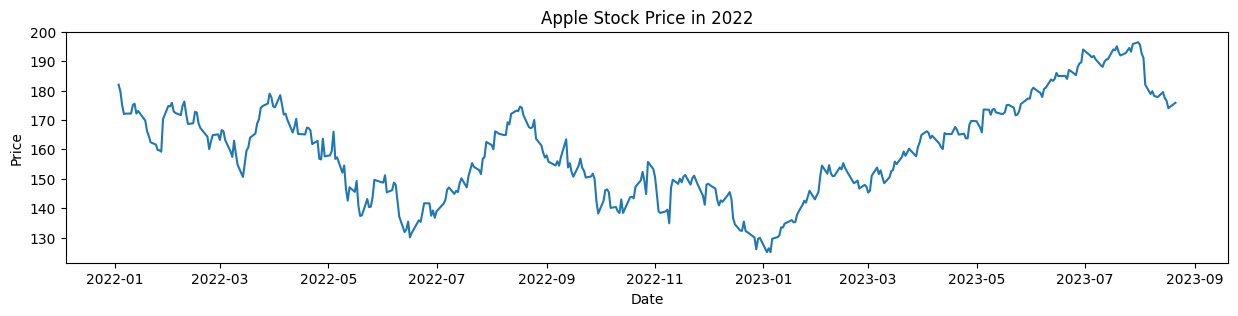

In [61]:
# 주식 가격 시각화하기
fig, ax = plt.subplots()
fig.set_size_inches(15,3)

sns.lineplot(data=df_stock_apple, x=df_stock_apple.index, y='Close')

ax.set_title('Apple Stock Price in 2022')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.show()

In [62]:
#한달 간격으로 다운샘플링
df_stock_apple_monthend = df_stock_apple.resample("BM").mean()
df_stock_apple_per10day = df_stock_apple.resample("10d").mean()
df_stock_apple_monthend.head(), df_stock_apple_per10day.head()

(                  Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2022-01-31  170.201500  172.447999  167.639500  169.861500  168.163885   
 2022-02-28  169.635262  171.585263  167.580524  169.830001  168.312175   
 2022-03-31  164.806956  167.164348  162.939131  165.310435  163.866817   
 2022-04-29  167.479001  169.518500  165.083002  166.820999  165.364192   
 2022-05-31  148.324286  150.950952  145.364284  148.430477  147.306046   
 
                   Volume  
 Date                      
 2022-01-31  1.054223e+08  
 2022-02-28  8.565875e+07  
 2022-03-31  9.481740e+07  
 2022-04-29  8.438978e+07  
 2022-05-31  1.143353e+08  ,
                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2022-01-03  175.397501  177.536249  173.493751  175.449999  173.696528   
 2022-01-13  170.004997  171.671664  167.451665  16

In [63]:
# 수익률 추가하기
df_stock_apple_monthend['close_rtn'] = df_stock_apple_monthend['Close'].pct_change()
df_stock_apple_monthend.head()

,Open,High,Low,Close,Adj Close,Volume,close_rtn
Date,,,,,,,
2022-01-31,170.201500,172.447999,167.639500,169.861500,168.163885,1.054223e+08,NaN
2022-02-28,169.635262,171.585263,167.580524,169.830001,168.312175,8.565875e+07,-0.000185
2022-03-31,164.806956,167.164348,162.939131,165.310435,163.866817,9.481740e+07,-0.026612
2022-04-29,167.479001,169.518500,165.083002,166.820999,165.364192,8.438978e+07,0.009138
2022-05-31,148.324286,150.950952,145.364284,148.430477,147.306046,1.143353e+08,-0.110241


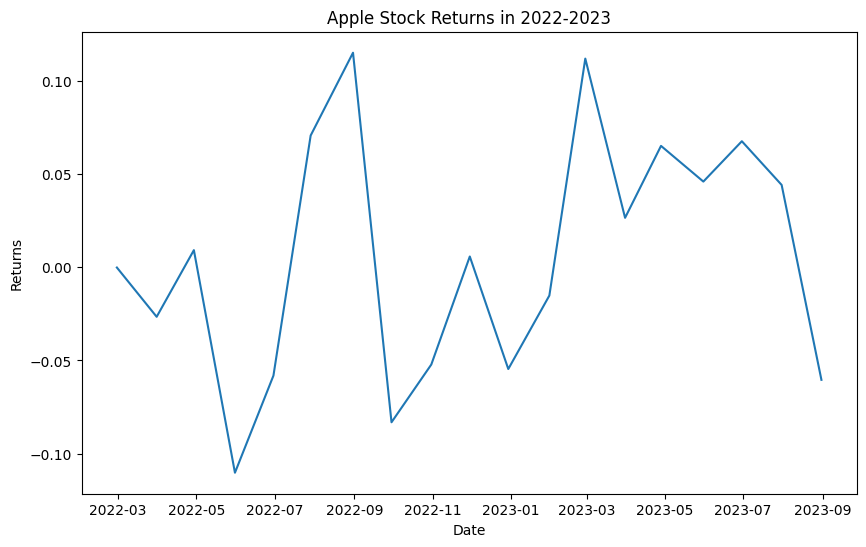

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.lineplot(data=df_stock_apple_monthend, x=df_stock_apple_monthend.index, y='close_rtn')

ax.set_title('Apple Stock Returns in 2022-2023')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')

plt.show()

In [65]:
df_stock_apple_monthend['close_ma'] = df_stock_apple_monthend['Close'].rolling(2).mean()
df_stock_apple_monthend

,Open,High,Low,Close,Adj Close,Volume,close_rtn,close_ma
Date,,,,,,,,
2022-01-31,170.201500,172.447999,167.639500,169.861500,168.163885,1.054223e+08,NaN,NaN
2022-02-28,169.635262,171.585263,167.580524,169.830001,168.312175,8.565875e+07,-0.000185,169.845750
2022-03-31,164.806956,167.164348,162.939131,165.310435,163.866817,9.481740e+07,-0.026612,167.570218
2022-04-29,167.479001,169.518500,165.083002,166.820999,165.364192,8.438978e+07,0.009138,166.065717
2022-05-31,148.324286,150.950952,145.364284,148.430477,147.306046,1.143353e+08,-0.110241,157.625738
2022-06-30,139.945714,141.919047,138.111430,139.798573,138.781348,8.329047e+07,-0.058155,144.114525
2022-07-29,148.436499,150.766000,147.141500,149.670499,148.581445,7.235627e+07,0.070615,144.734536
2022-08-31,166.956522,168.589566,165.533913,166.885218,165.861851,6.566259e+07,0.115017,158.277859
2022-09-30,153.284286,155.308573,150.893333,153.002856,152.100538,9.927251e+07,-0.083185,159.944037


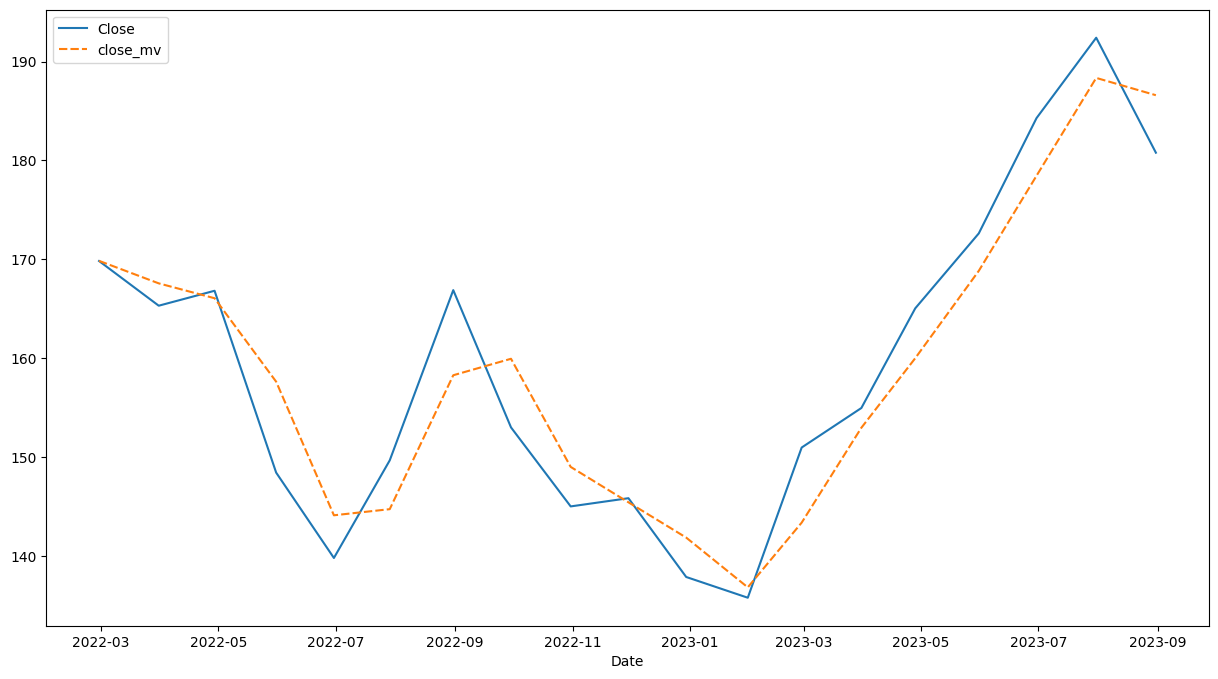

In [55]:
# df_month.iloc[:,[3,7]].plot(figsize=(15,8))

df_stock_apple_monthend00 = df_stock_apple_monthend.iloc[:,[3,7]].dropna()

fig, ax = plt.subplots()
fig.set_size_inches(15,8)

sns.lineplot(data=df_stock_apple_monthend00)

plt.show()


In [67]:
last_close = df_stock_apple_monthend['close_ma'].iloc[-2] # 이동평균선 60일 전 종가
print(last_close)
price = df_stock_apple_monthend['Close'].iloc[-1] # 오늘 종가
print(price)
if price > last_close:
    print('상승 장')
elif price < last_close:
    print('하락 장')
else:
    print('변화없음')

188.34741689404763
180.7840015333333
하락 장


In [73]:
file_path = './Data02/'
file_date = pendulum.now().to_date_string()
file_name = 'apple_data.csv'
df_stock_apple_monthend.to_csv(file_path+file_date+'_'+file_name)